<a href="https://colab.research.google.com/github/SpencerZPoole/School-Programming/blob/master/SP_notebookExam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Spencer Z Poole

**CS167 Exam 1 Notebook**

**Due 3/12 by 11:59pm**

In [749]:
import pandas as pd
import numpy
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [750]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [751]:
def regress_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

In [752]:
def calculate_mae(test_data, predictions, test_data_size):
  sum = 0
  for i in range(test_data_size):
    sum += abs(test_data['Class'].iloc[i] - predictions.iloc[i])
  mae = sum / test_data_size
  return mae


In [753]:
import matplotlib.pyplot as plt
%matplotlib inline

def model_test_MAE(test_data_size, random_state_seed):
  #establish training and testing sets
  #shuffle the data - "sampling" the full set in random order
  shuffled_data = fuelType_regular_vehicles.sample(frac=1, random_state=random_state_seed)

  #use the first 'test_data_size' rows in the shuffled set as testing data #train with the rest
  test_data = shuffled_data.iloc[0:test_data_size]
  train_data = shuffled_data.iloc[test_data_size:]

  k_vals = [1,3,5,9,15,21,31,51,101,129]
  kNN_maes = []

  for k in k_vals:
    predictions = regress_all_kNN(test_data,train_data,k)
    current_mae = calculate_mae(test_data, predictions, test_data_size)
    kNN_maes.append(current_mae)

  plt.suptitle('Vehicle Data k-NN Experiment',fontsize=18)
  plt.xlabel('k')
  plt.ylabel('Mean Absolute Error')
  plt.plot(k_vals,kNN_maes,'ro-',label='k-NN')
  plt.legend(loc='lower left', shadow=True)
  plt.axis([0,130,0,3])

  plt.show()


In [754]:
zooData = [['Giraffe', 1, 'Hooves', 490, 1930, 'Mammal'],['Rattlesnake', 0, 'None', 150, 2.4, 'Reptile'], ['Rhino', 1, 'Hooves', 180, 700, 'Mammal'],  \
           ['Bobcat', 0, "Claws", 80, 10, "Mammal"], ['Great Tortoise', 0, 'Claws', 122, 250, 'Reptile'], ['Prairie Dog', 0, 'Claws', 40, 1.5, 'Mammal'], ['Horned Lizard', 1, 'Claws', 10, 1, 'Reptile']]
zoodf = pd.DataFrame(zooData, columns = ['Animal', 'Horns', 'Feet', 'Height/length (cm)', 'Weight (kg)', 'Class'])
zoodf

,Animal,Horns,Feet,Height/length (cm),Weight (kg),Class
0,Giraffe,1,Hooves,490,1930.0,Mammal
1,Rattlesnake,0,None,150,2.4,Reptile
2,Rhino,1,Hooves,180,700.0,Mammal
3,Bobcat,0,Claws,80,10.0,Mammal
4,Great Tortoise,0,Claws,122,250.0,Reptile
5,Prairie Dog,0,Claws,40,1.5,Mammal
6,Horned Lizard,1,Claws,10,1.0,Reptile


Calculate the mean for the ‘weight’ column. Round your answer to the nearest kg.

In [755]:
zoo_weight_mean = zoodf['Weight (kg)'].mean()
zoo_weight_std = zoodf['Weight (kg)'].std()
print(zoo_weight_mean)
print(zoo_weight_std)

413.5571428571429
716.5080177665909


In [756]:
zoodfZScoreWeight = zoodf.copy()
zoodfZScoreWeight['Weight (kg)'] = (zoodf['Weight (kg)'] - zoo_weight_mean)/zoo_weight_std
zoodfZScoreWeight

,Animal,Horns,Feet,Height/length (cm),Weight (kg),Class
0,Giraffe,1,Hooves,490,2.116435,Mammal
1,Rattlesnake,0,None,150,-0.573835,Reptile
2,Rhino,1,Hooves,180,0.399776,Mammal
3,Bobcat,0,Claws,80,-0.563228,Mammal
4,Great Tortoise,0,Claws,122,-0.228270,Reptile
5,Prairie Dog,0,Claws,40,-0.575091,Mammal
6,Horned Lizard,1,Claws,10,-0.575789,Reptile


Calculate the information gain from the ‘Horns’ column. Clearly show your work by uploading a picture or a file explaining your answer.

In [757]:
import math

def entropy(percentage_list):
    #input: percentage_list consists of float values that sum to 1.0 
    #return: calculation of entropy for input percentages
    result = 0
    for percentage in percentage_list:
        if percentage != 0:
            result += -percentage*math.log2(percentage)
    return result

In [758]:
zoodf[['Horns', 'Class']].sort_values('Horns')

,Horns,Class
1,0,Reptile
3,0,Mammal
4,0,Reptile
5,0,Mammal
0,1,Mammal
2,1,Mammal
6,1,Reptile


In [759]:
entropyZeroHorns = entropy([2/4, 2/4])
entropyZeroHorns

1.0

In [760]:
entropyOneHorn = entropy([2/3,1/3])
entropyOneHorn

0.9182958340544896

In [761]:
hornsExpectedEntropy = ( ((4/7)*entropyZeroHorns) + ((3/7)*entropyOneHorn) )
hornsExpectedEntropy

0.9649839288804954

In [762]:
gainHorns = 1 - hornsExpectedEntropy
gainHorns

0.035016071119504555

The zoo has encountered a new kind of animal and they want to be able to say if it is a ‘mammal’ or a ‘reptile’. The staff was able to get some measurements (unfortunately only height and weight) and they want to know what you would predict. Using only the ‘height’ and ‘weight’ columns with Euclidean distance and k=3, what would the 3 nearest neighbor algorithm predict? Show your work by uploading a picture/screenshot of your work. Make sure the answer to the question is clearly visible. 

If you choose to use excel or python to calculate the distances, please include a screenshot of either your formula or code.

New Alien -- -- 268 415 ?????

In [763]:
# knn regression function
def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['Height/length (cm)']-data_copy['Height/length (cm)'])**2
    +(specimen['Weight (kg)']-data_copy['Weight (kg)'])**2)
  
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['Class'].mean()

In [764]:
# knn classification function
def classification_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['Height/length (cm)']-data_copy['Height/length (cm)'])**2
    +(specimen['Weight (kg)']-data_copy['Weight (kg)'])**2)
  
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['Class'].mode().iloc[0]

In [765]:
newAlien = {}
newAlien['Animal'] = 'New Alien'
newAlien['Height/length (cm)'] = 268
newAlien['Weight (kg)'] = 415

classification_kNN(newAlien, zoodf, 3)

'Reptile'

Now, use a weighted k-Nearest-Neighbors algorithm on the same data. What ‘Class’ does a weighted 3NN predict the new alien will be? Upload your work (either a picture of your written work, or a file with your typed out work). Make sure the answer is clearly visible. 

In [766]:
# knn classification weighted function
def classification_kNN_weighted(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['Height/length (cm)']-data_copy['Height/length (cm)'])**2
    +(specimen['Weight (kg)']-data_copy['Weight (kg)'])**2)
  
  data_copy['weight'] = 1/(data_copy['distance_to_new']**2)

  sorted_data = data_copy.sort_values(['distance_to_new'])
  sorted_data = sorted_data.iloc[0:k]
  sorted_data = sorted_data.sort_values(['weight'])
  print(sorted_data)
  return sorted_data.iloc[k-1]['Class']

In [767]:
classification_kNN_weighted(newAlien, zoodf, 3)

           Animal  Horns    Feet  ...    Class  distance_to_new    weight
1     Rattlesnake      0    None  ...  Reptile       429.141888  0.000005
2           Rhino      1  Hooves  ...   Mammal       298.276717  0.000011
4  Great Tortoise      0   Claws  ...  Reptile       220.320221  0.000021

[3 rows x 8 columns]


'Reptile'

In [768]:
flightData = [[80, 1500, 6, 230], [35, 1945, 3, 450], [91, 923, 7, 175], [75, 2300, 10, 1200]]
flightdf = pd.DataFrame(flightData, columns = ['Destination Temperature (F)', 'Distance of Flight (miles)', 'Duration of Vacation', 'Cost of Roundtrip Flights'])
flightdf

,Destination Temperature (F),Distance of Flight (miles),Duration of Vacation,Cost of Roundtrip Flights
0,80,1500,6,230
1,35,1945,3,450
2,91,923,7,175
3,75,2300,10,1200


In [769]:
newVacation = {}
newVacation['Destination Temperature (F)'] = 83
newVacation['Distance of Flight (miles)'] = 1700
newVacation['Duration of Vacation'] = 4



In [770]:
# flight knn regression function
def flight_regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['Destination Temperature (F)']-data_copy['Destination Temperature (F)'])**2
    +(specimen['Distance of Flight (miles)']-data_copy['Distance of Flight (miles)'])**2
    +(specimen['Duration of Vacation']-data_copy['Duration of Vacation'])**2)
  
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['Cost of Roundtrip Flights'].mean()

In [771]:
flight_regression_kNN(newVacation, flightdf, 3)

626.6666666666666

Let’s say we found out that the actual price for our destination (that’s 83 degrees, 1700 miles away, and 4 days long) was $291. What is the MSE for the prediction that we made in the previous question? Round to the nearest whole number.

In [772]:
flightData = [[80, 1500, 6, 230], [35, 1945, 3, 450], [91, 923, 7, 175], [75, 2300, 10, 1200], [83, 1700, 4, 291]]
flightdf = pd.DataFrame(flightData, columns = ['Destination Temperature (F)', 'Distance of Flight (miles)', 'Duration of Vacation', 'Cost of Roundtrip Flights'])
flightdf

,Destination Temperature (F),Distance of Flight (miles),Duration of Vacation,Cost of Roundtrip Flights
0,80,1500,6,230
1,35,1945,3,450
2,91,923,7,175
3,75,2300,10,1200
4,83,1700,4,291


In [773]:
def regress_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    return test_data.apply(flight_regression_kNN,args=(train_data,k),axis=1)

In [774]:
def calculate_mse(test_data, predictions, test_data_size):
  sum = 0
  for i in range(test_data_size):
    sum += (test_data['Cost of Roundtrip Flights'].iloc[i] - predictions.iloc[i])**2
  mse = sum / test_data_size
  return mse


In [775]:
import matplotlib.pyplot as plt
%matplotlib inline

def model_test_MSE(test_data_size):
  test_data = flightdf.iloc[0:test_data_size]
  train_data = flightdf.iloc[test_data_size:]
  k_vals = [1,2,3,4,5]
  kNN_mses = []

  for k in k_vals:
    predictions = regress_all_kNN(test_data,train_data,k)
    current_mse = calculate_mse(test_data, predictions, test_data_size)
    print(current_mse)
    kNN_mses.append(current_mse)

  plt.suptitle('Flight k-NN Experiment',fontsize=18)
  plt.xlabel('k')
  plt.ylabel('Mean Squared Absolute Error')
  plt.plot(k_vals,kNN_mses,'ro-',label='k-NN')
  plt.legend(loc='lower left', shadow=True)
  plt.axis([0,5,0,250000])

  plt.show()


217184.75
217184.75
217184.75
217184.75
217184.75


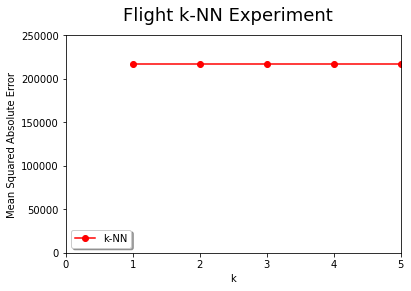

In [776]:
model_test_MSE(4)